In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

colNames = ["Age", "YearOfOperation", "AuxNodeCount", "Survival"]
cancer_data = pd.read_csv("haberman.data.txt", header=None, names=colNames)
cancer_data.head()

,Age,YearOfOperation,AuxNodeCount,Survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [3]:
cancer_data.describe(include="all")

,Age,YearOfOperation,AuxNodeCount,Survival
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [5]:
from sklearn.model_selection import train_test_split

# Take first 3 column INDEPENDENT variable
X = np.array(cancer_data.iloc[:,0:3])
# Last column is TARGET/DEPENDENT variable
y = np.array(cancer_data["Survival"])

# split data into train 80% test 20%

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as sm

knn = KNeighborsClassifier(n_neighbors=16, algorithm="auto", metric="manhattan")
knn.fit(X_train, y_train)
pred = knn.predict(X_test)



print("KNN Score:{}, ACCURACY Score:{}".format(knn.score ,sm.accuracy_score(y_test, pred, normalize=True)))

KNN Score:<bound method ClassifierMixin.score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=1, n_neighbors=16, p=2,
           weights='uniform')>, ACCURACY Score:0.7580645161290323


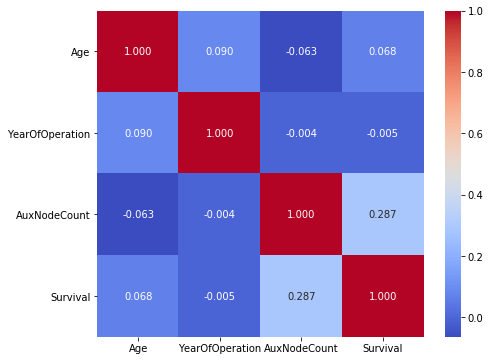

In [11]:
import seaborn as sns

corr = cancer_data.corr()

plt.figure(figsize=(7.5,6))

sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.3f',annot_kws={'size': 10},
           xticklabels= colNames, yticklabels= colNames,
           cmap= 'coolwarm')
# The correlation matrix shows AuxNodeCount and Survival has higher correlation

Optimal K: 8 misclassification_error 0.24107246376811597


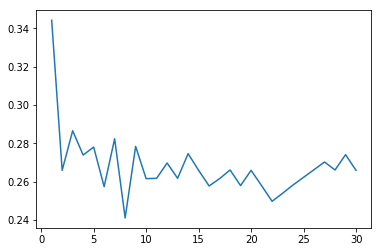

In [13]:
# Doing Cross Validation to get Optimal K
# Here used MANHATTAN distance
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score

neighbors = list(range(1,31))

cv_scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, algorithm="auto", metric="manhattan")
    scores = cross_val_score(knn, X_train, y_train, cv = 10, scoring="accuracy")
    cv_scores.append(scores.mean())
    
misclassification_error = [1-x for x in cv_scores]    
# print((cv_scores))
optimal_k = neighbors[misclassification_error.index(min(misclassification_error))]
print("Optimal K: {} misclassification_error {}".format(optimal_k,min(misclassification_error)))

plt.plot(neighbors, misclassification_error)

Optimal K: 8 misclassification_error 0.24157246376811592


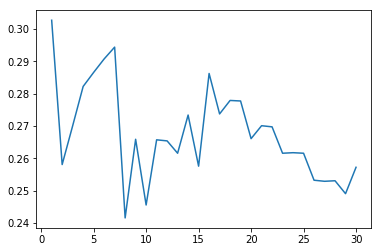

In [14]:
# Here used MINKOWSKI distance, which is picked by default if we do not mention

from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score

neighbors = list(range(1,31))

cv_scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, algorithm="auto", metric="minkowski")
    scores = cross_val_score(knn, X_train, y_train, cv = 10, scoring="accuracy")
    cv_scores.append(scores.mean())
    
misclassification_error = [1-x for x in cv_scores]    
# print((cv_scores))
optimal_k = neighbors[misclassification_error.index(min(misclassification_error))]
print("Optimal K: {} misclassification_error {}".format(optimal_k,min(misclassification_error)))

plt.plot(neighbors, misclassification_error)